In [57]:
import itertools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(style="whitegrid")
color_palette = ['Red', 'Black', 'Blue']
figsize=(12,6)

In [58]:
matplotlib.rcParams.update({'font.size': 22})

In [3]:
df_dir = {}

In [4]:
# _2 is for normal case
# _3 is for when switch power is not considered

as_number = '13129'
sfc_duration = '3600'
opt_name = {'c':'Optimal'}#, 'h':'Tabu Search', 'f':'First Fit'}
for opt in opt_name.keys():
    for ar in range(1, 11):
        arrival_rate = '{:4.2f}'.format(ar*0.01)
        run_id = opt + '_' + as_number + '_' + arrival_rate + '_' + sfc_duration
        df_id = run_id.replace('.', '_') + '_sp' # with switch power
        exec(df_id + '_df = pd.read_csv(' + '"server_nfvpod_spread_data/' + run_id + '_2/sfc_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Switch Power'] = 'Yes'
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['Arrival Rate'] = arrival_rate
        df_dir[df_id]['Server Spread'] = df_dir[df_id]['server_count'] / df_dir[df_id]['vnf_count']
        df_dir[df_id]['NFV-POD Spread'] = df_dir[df_id]['co_count'] / df_dir[df_id]['vnf_count']
        print(df_id)
        
        df_id = run_id.replace('.', '_') + '_nsp' # without switch power
        exec(df_id + '_df = pd.read_csv(' + '"server_nfvpod_spread_data/' + run_id + '_3/sfc_data.csv' + '", index_col="timeslot")' )
        exec('df_dir["' + df_id + '"] = ' + df_id + '_df')
        df_dir[df_id]['Switch Power'] = 'No'
        df_dir[df_id]['Optimizer'] = opt_name[opt]
        df_dir[df_id]['Arrival Rate'] = arrival_rate
        df_dir[df_id]['Server Spread'] = df_dir[df_id]['server_count'] / df_dir[df_id]['vnf_count']
        df_dir[df_id]['NFV-POD Spread'] = df_dir[df_id]['co_count'] / df_dir[df_id]['vnf_count']
        print(df_id)

c_13129_0_01_3600_sp
c_13129_0_01_3600_nsp
c_13129_0_02_3600_sp
c_13129_0_02_3600_nsp
c_13129_0_03_3600_sp
c_13129_0_03_3600_nsp
c_13129_0_04_3600_sp
c_13129_0_04_3600_nsp
c_13129_0_05_3600_sp
c_13129_0_05_3600_nsp
c_13129_0_06_3600_sp
c_13129_0_06_3600_nsp
c_13129_0_07_3600_sp
c_13129_0_07_3600_nsp
c_13129_0_08_3600_sp
c_13129_0_08_3600_nsp
c_13129_0_09_3600_sp
c_13129_0_09_3600_nsp
c_13129_0_10_3600_sp
c_13129_0_10_3600_nsp


In [5]:
df_dir['c_13129_0_01_3600_sp'].head()

,sfc_id,vnf_count,server_count,co_count,path_stretch,Switch Power,Optimizer,Arrival Rate,Server Spread,NFV-POD Spread
timeslot,,,,,,,,,,
0,0,6,4,1,25,Yes,Optimal,0.01,0.666667,0.166667
0,1,4,3,2,25,Yes,Optimal,0.01,0.750000,0.500000
0,2,3,3,2,23,Yes,Optimal,0.01,1.000000,0.666667
0,3,4,4,1,28,Yes,Optimal,0.01,1.000000,0.250000
0,4,6,5,3,40,Yes,Optimal,0.01,0.833333,0.500000


In [6]:
df_dir['c_13129_0_01_3600_nsp'].head()

,sfc_id,vnf_count,server_count,co_count,path_stretch,Switch Power,Optimizer,Arrival Rate,Server Spread,NFV-POD Spread
timeslot,,,,,,,,,,
0,0,6,4,3,45,No,Optimal,0.01,0.666667,0.500000
0,1,4,2,3,24,No,Optimal,0.01,0.500000,0.750000
0,2,3,2,3,20,No,Optimal,0.01,0.666667,1.000000
0,3,4,3,3,28,No,Optimal,0.01,0.750000,0.750000
0,4,6,4,4,40,No,Optimal,0.01,0.666667,0.666667


In [7]:
spread_df = pd.concat(list(df_dir.values()), axis=0)

In [8]:
spread_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4294 entries, 0 to 23
Data columns (total 10 columns):
sfc_id            4294 non-null int64
vnf_count         4294 non-null int64
server_count      4294 non-null int64
co_count          4294 non-null int64
path_stretch      4294 non-null int64
Switch Power      4294 non-null object
Optimizer         4294 non-null object
Arrival Rate      4294 non-null object
Server Spread     4294 non-null float64
NFV-POD Spread    4294 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 369.0+ KB


<Figure size 1440x648 with 0 Axes>

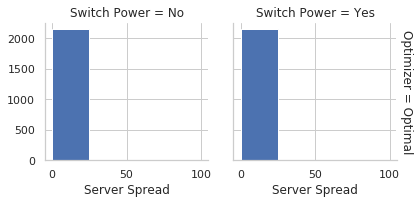

In [9]:
plt.figure(figsize=(20,9))
grid = sns.FacetGrid(spread_df, row="Optimizer", col="Switch Power", margin_titles=True)
grid.map(plt.hist, "Server Spread", bins=np.linspace(0, 100, 5));

<Figure size 1440x648 with 0 Axes>

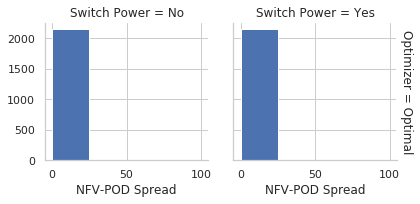

In [10]:
plt.figure(figsize=(20,9))
grid = sns.FacetGrid(spread_df, row="Optimizer", col="Switch Power", margin_titles=True)
grid.map(plt.hist, "NFV-POD Spread", bins=np.linspace(0, 100, 5));

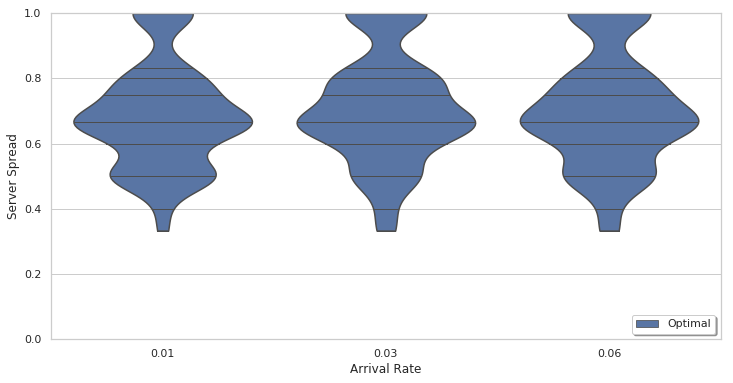

In [11]:
plt.figure(figsize=figsize)
df = ((spread_df["Arrival Rate"] == '0.01') | (spread_df["Arrival Rate"] == '0.03') | 
               (spread_df["Arrival Rate"] == '0.06'))
sns.violinplot(x="Arrival Rate", y="Server Spread", hue="Optimizer", 
               data=spread_df[df], cut=0, 
               inner="stick")
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=3)

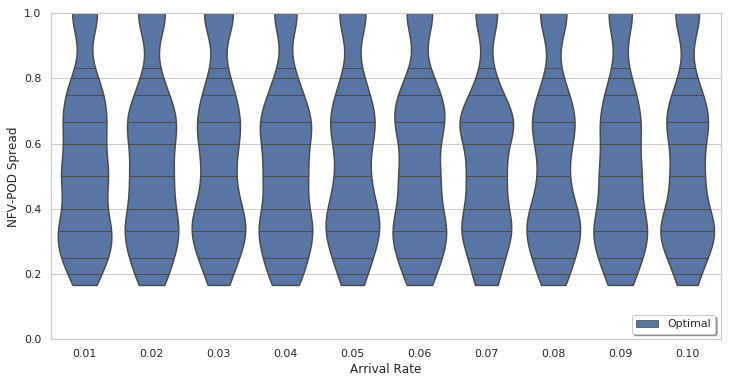

In [12]:
plt.figure(figsize=figsize)
sns.violinplot(x="Arrival Rate", y="NFV-POD Spread", hue="Optimizer", 
               data=spread_df, cut=0,
               inner="stick")
plt.ylim(0, 1.0)
plt.legend(loc='lower right', fancybox=True, shadow=True, ncol=3)

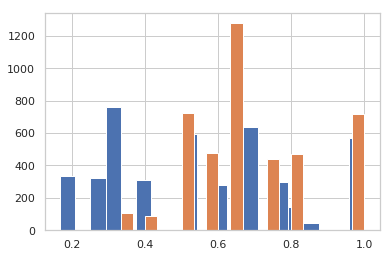

In [13]:
spread_df['NFV-POD Spread'].hist(bins=20)
spread_df['Server Spread'].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa637e56550>,
      dtype=object)

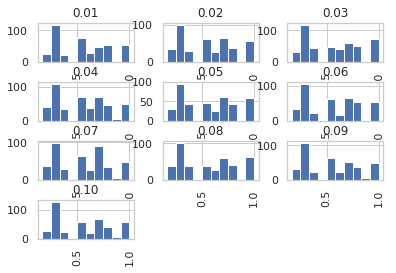

In [14]:
spread_df.hist(column='NFV-POD Spread', by='Arrival Rate')

In [70]:
matplotlib.rcParams.update({'font.size': 14})

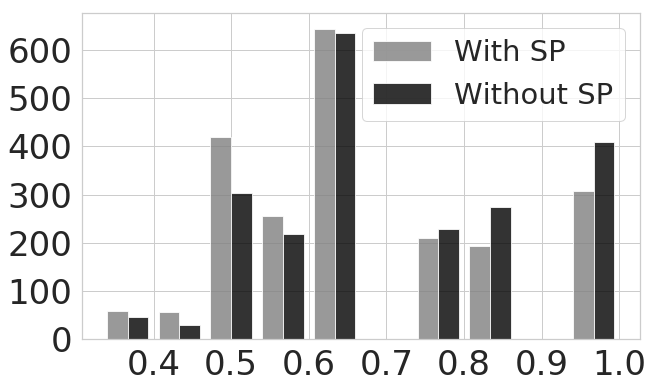

In [103]:
fig, ax = plt.subplots(figsize=(10,6))
x = spread_df[spread_df['Switch Power'] == 'Yes']['Server Spread']
y = spread_df[spread_df['Switch Power'] == 'No']['Server Spread']
ax.hist([x, y], color=['gray','black'], label=['With SP', 'Without SP'], alpha=0.8)
ax.legend(loc='best', fontsize=29)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(34)

In [104]:
fig.savefig('13129_switch_power_server_spread.pdf', dpi=600)

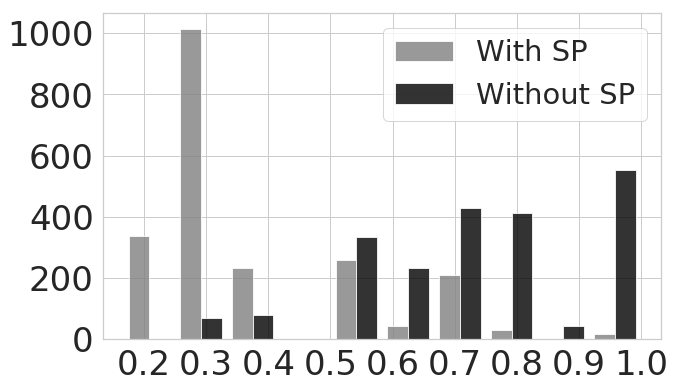

In [105]:
fig, ax = plt.subplots(figsize=(10,6))
x = spread_df[spread_df['Switch Power'] == 'Yes']['NFV-POD Spread']
y = spread_df[spread_df['Switch Power'] == 'No']['NFV-POD Spread']
ax.hist([x, y], color=['gray','black'], label=['With SP', 'Without SP'], alpha=0.8)
ax.legend(loc='best', fontsize=29)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(34)

In [106]:
fig.savefig('13129_switch_power_nfv_pod_spread.pdf', dpi=1200)

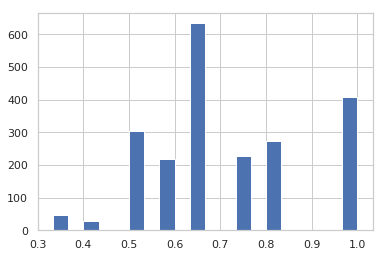

In [17]:
spread_df[spread_df['Switch Power'] == 'No']['Server Spread'].hist(bins=20)

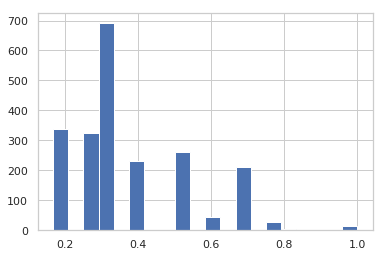

In [18]:
spread_df[spread_df['Switch Power'] == 'Yes']['NFV-POD Spread'].hist(bins=20)

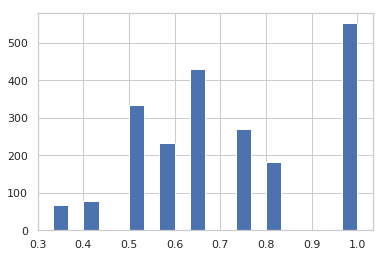

In [19]:
spread_df[spread_df['Switch Power'] == 'No']['NFV-POD Spread'].hist(bins=20)

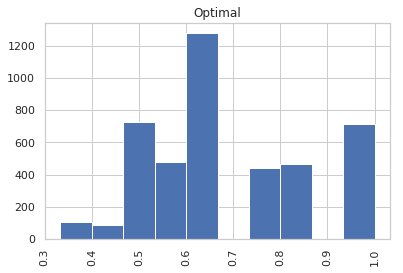

In [20]:
spread_df.hist(column='Server Spread', by='Optimizer')